# Book covers classification with Tensorflow

I love books and I'd like to learn more about Tensorflow; why not combine it!  

I took [this](https://www.kaggle.com/datasets/lukaanicin/book-covers-dataset) dataset from kaggle  with covers of books of different genres; I want to make a bit of EDA, train a network to classify books by categories and maybe even start generating my own covers!

In [1]:
!pip install --user numpy seaborn --upgrade

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df = pd.read_csv('./data/main_dataset.csv')
df.head()

image  \
0  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
1  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
2  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
3  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
4  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   

                       name            author     format  \
0     This is Going to Hurt          Adam Kay  Paperback   
1   Thinking, Fast and Slow   Daniel Kahneman  Paperback   
2   When Breath Becomes Air    Paul Kalanithi  Paperback   
3        The Happiness Trap       Russ Harris  Paperback   
4  Man's Search For Meaning  Viktor E. Frankl  Paperback   

   book_depository_stars price currency  old_price           isbn category  \
0                    4.5   7.6        $       11.4  9781509858637  Medical   
1                    4.0  11.5        $       15.0  9780141033570  Medical   
2                    4.5  9.05        $       11.5  9781784701994  Medical   
3                    4.0  8.34        $       13.9  9781845298258  Medical   
4                    4.5  9.66        $        NaN  9781846041242  Medical   

                     img_paths  
0  dataset/Medical/0000001.jpg  
1  dataset/Medical/0000002.jpg  
2  dataset/Medical/0000003.jpg  
3  dataset/Medical/0000004.jpg  
4  dataset/Medical/0000005.jpg

We need to clean the dataframe a bit:

In [4]:
df.drop(columns=['image', 'format', 'price', 'currency', 'old_price', 'isbn'], inplace=True)
df.head()

name            author  book_depository_stars category  \
0     This is Going to Hurt          Adam Kay                    4.5  Medical   
1   Thinking, Fast and Slow   Daniel Kahneman                    4.0  Medical   
2   When Breath Becomes Air    Paul Kalanithi                    4.5  Medical   
3        The Happiness Trap       Russ Harris                    4.0  Medical   
4  Man's Search For Meaning  Viktor E. Frankl                    4.5  Medical   

                     img_paths  
0  dataset/Medical/0000001.jpg  
1  dataset/Medical/0000002.jpg  
2  dataset/Medical/0000003.jpg  
3  dataset/Medical/0000004.jpg  
4  dataset/Medical/0000005.jpg

In [5]:
genres = sorted(list(df['category'].unique()))
genres

['Art-Photography',
 'Biography',
 'Business-Finance-Law',
 'Childrens-Books',
 'Computing',
 'Crafts-Hobbies',
 'Crime-Thriller',
 'Dictionaries-Languages',
 'Entertainment',
 'Food-Drink',
 'Graphic-Novels-Anime-Manga',
 'Health',
 'History-Archaeology',
 'Home-Garden',
 'Humour',
 'Medical',
 'Mind-Body-Spirit',
 'Natural-History',
 'Personal-Development',
 'Poetry-Drama',
 'Reference',
 'Religion',
 'Romance',
 'Science-Fiction-Fantasy-Horror',
 'Science-Geography',
 'Society-Social-Sciences',
 'Sport',
 'Stationery',
 'Teaching-Resources-Education',
 'Technology-Engineering',
 'Teen-Young-Adult',
 'Transport',
 'Travel-Holiday-Guides']

In [6]:
df.describe(include='all')

name         author  book_depository_stars  \
count              32581          32383           32581.000000   
unique             20590          11807                    NaN   
top     Piano Adventures  Lonely Planet                    NaN   
freq                  34            325                    NaN   
mean                 NaN            NaN               4.015024   
std                  NaN            NaN               0.751260   
min                  NaN            NaN               0.000000   
25%                  NaN            NaN               4.000000   
50%                  NaN            NaN               4.000000   
75%                  NaN            NaN               4.500000   
max                  NaN            NaN               5.000000   

                category                    img_paths  
count              32581                        32581  
unique                33                        32581  
top     Teen-Young-Adult  dataset/Medical/0000001.jpg  
freq                 990                            1  
mean                 NaN                          NaN  
std                  NaN                          NaN  
min                  NaN                          NaN  
25%                  NaN                          NaN  
50%                  NaN                          NaN  
75%                  NaN                          NaN  
max                  NaN                          NaN

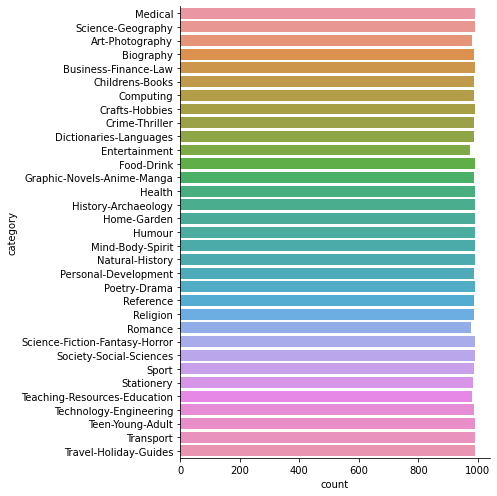

In [7]:
sns.color_palette("husl", 8)
sns.catplot(data=df, y='category', kind='count', height=7)

As we can see, there's around 1000 covers in every cathegory; it means, our dataset is balanced. 
Let's look at the top authors:

In [8]:
top_authors = df[['author','name']].groupby(['author'])['name'].count().nlargest(20)
top_authors

author
Lonely Planet          325
J. K. Rowling          111
DK                     108
Moleskine               97
Stephen King            76
Terry Pratchett         74
Roald Dahl              73
William Shakespeare     66
ABRSM                   64
Running Press           64
Cassandra Clare         61
Robert Kirkman          61
Thich Nhat Hanh         61
Keri Smith              58
Bill Bryson             52
Roderick Hunt           51
Willard A Palmer        51
Jason Hazeley           50
Nora Roberts            50
Oliver Sacks            50
Name: name, dtype: int64

I see some familiar names, but some of 'authors' are evidently not people; let's look, what's 'Lonely Planet'

In [9]:
df[df['author'] == 'Lonely Planet'].head()

name         author  \
9124       Lonely Planet Korean Phrasebook & Dictionary  Lonely Planet   
9418        Lonely Planet Dutch Phrasebook & Dictionary  Lonely Planet   
9430       Lonely Planet Europe Phrasebook & Dictionary  Lonely Planet   
9478  Lonely Planet Farsi (Persian) Phrasebook & Dic...  Lonely Planet   
9580        Lonely Planet Australian Language & Culture  Lonely Planet   

      book_depository_stars                category  \
9124                    4.0  Dictionaries-Languages   
9418                    4.0  Dictionaries-Languages   
9430                    3.5  Dictionaries-Languages   
9478                    4.5  Dictionaries-Languages   
9580                    4.0  Dictionaries-Languages   

                                       img_paths  
9124  dataset/Dictionaries-Languages/0000237.jpg  
9418  dataset/Dictionaries-Languages/0000531.jpg  
9430  dataset/Dictionaries-Languages/0000543.jpg  
9478  dataset/Dictionaries-Languages/0000591.jpg  
9580  dataset/Dictionaries-Languages/0000693.jpg

Oh, I see: 'Lonely planet', 'DK', 'Moleskin', etc are publishing companies. No worries, we weren't going to predict an author anyway.  
Now let's take a look at some covers:

In [10]:
import random

import PIL
from PIL import Image

random.seed(34)

In [11]:
sample_books = df.sample(16).reset_index()

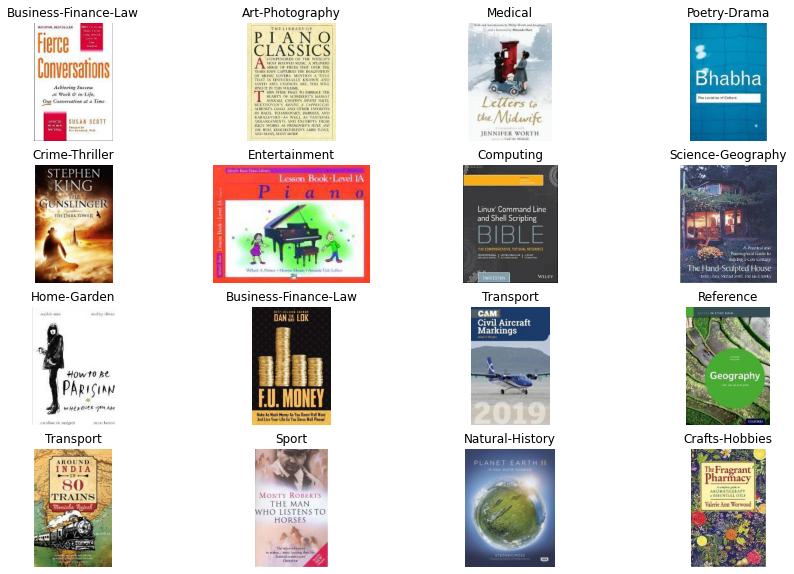

In [12]:
plt.figure(figsize=(15, 10))
for ind, book in sample_books.iterrows():
    book_cover = Image.open('./data/' + book['img_paths'])
    ax = plt.subplot(4, 4, ind + 1)
    plt.title(book['category'])
    plt.axis('off')
    ax.imshow(book_cover)

Why don't we look at the covers grouped by genre:

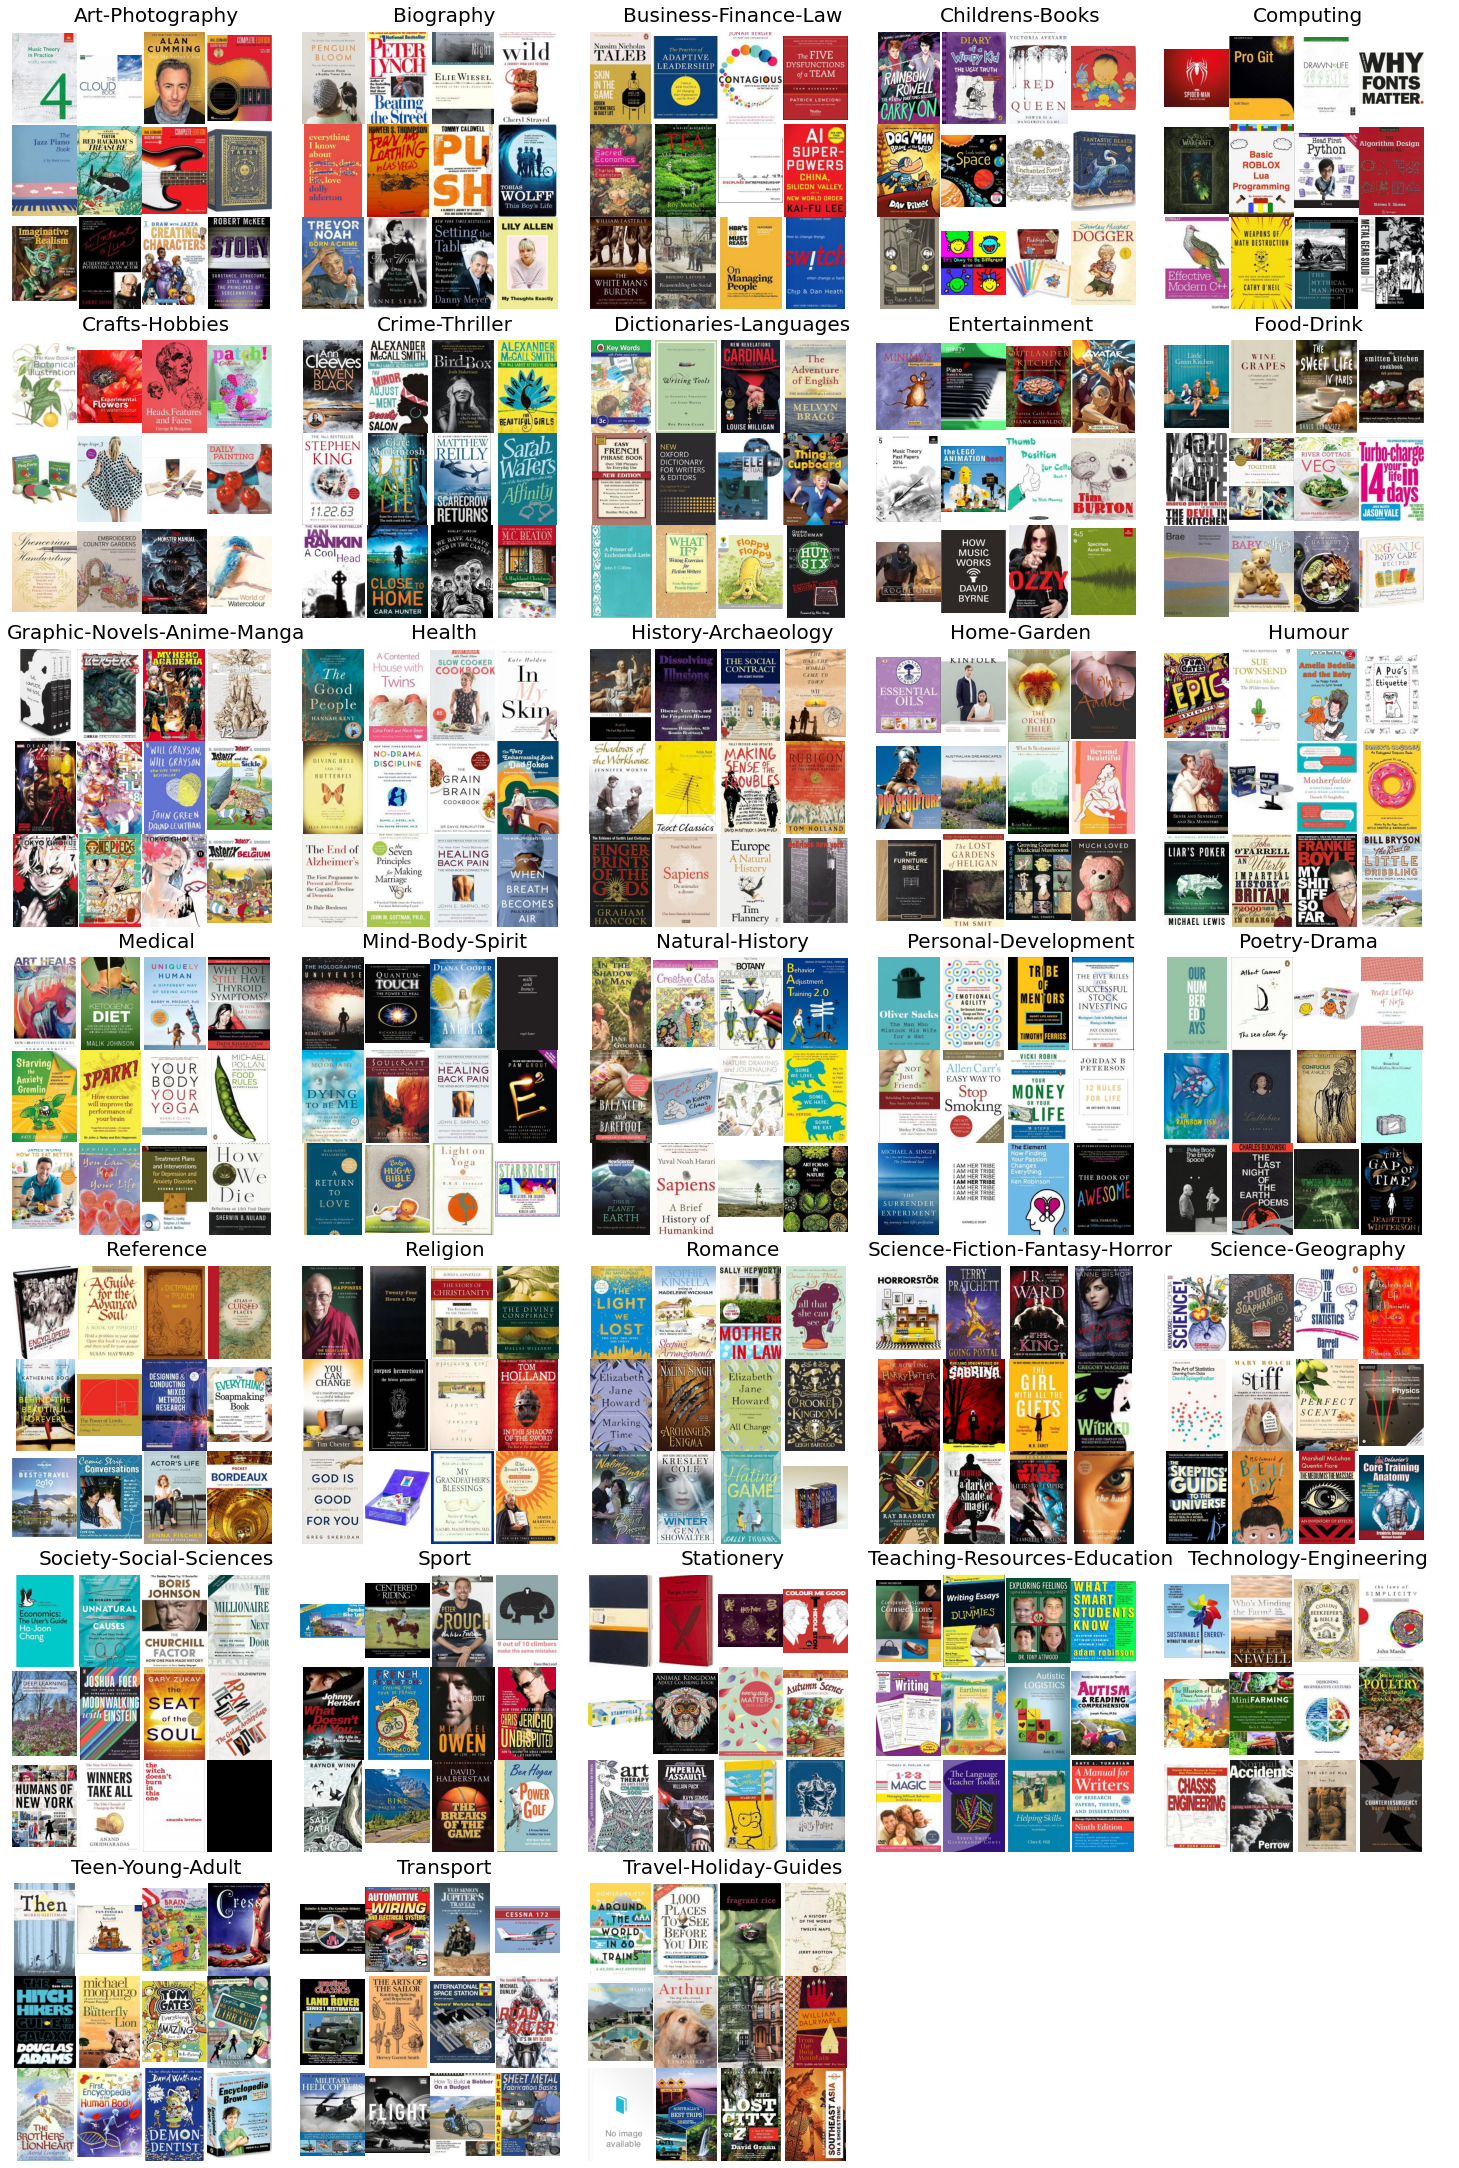

In [13]:
fig = plt.figure(figsize=(20, 30))
subfigs = fig.subfigures(nrows=7, ncols=5, wspace=1)
for i, genre in enumerate(genres):
    subfigure = subfigs[i//5][i%5]
    books_by_genre = df[df['category'] == genre].sample(12).reset_index()
    for ind, book in books_by_genre.iterrows():
        book_cover = Image.open('./data/' + book['img_paths'])
        ax = subfigure.add_subplot(3, 4, ind + 1)
        plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(book_cover)
    subfigure.suptitle(genre, fontsize=20)
fig.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0, wspace=0, hspace=0)
plt.show()

As for me, it's a bit too many genres; I'm going to unite some of them. It's a bit random: actually, I don't think that graphic novels are for kids (sorry!)

In [17]:
classes_to_genres = {
    'Kids': ['Childrens-Books', 'Teen-Young-Adult', 'Graphic-Novels-Anime-Manga',],
    'Health': ['Medical', 'Mind-Body-Spirit', 'Health',],
    'Science': ['Natural-History', 'Science-Geography', 'Society-Social-Sciences', 'History-Archaeology'],
    'Culture': ['Art-Photography',  'Entertainment', 'Biography', 'Sport', 'Religion'],
    'Hobby': ['Crafts-Hobbies', 'Home-Garden', 'Food-Drink', 'Travel-Holiday-Guides', 'Stationery',],
    'Technology': ['Computing', 'Technology-Engineering', 'Transport',],
    'Mystery': [ 'Crime-Thriller',],
    'Education': ['Dictionaries-Languages',  'Teaching-Resources-Education', 'Reference', 'Personal-Development', 'Business-Finance-Law',],
    'Fantasy': ['Science-Fiction-Fantasy-Horror',],
    'Romance': [ 'Romance',],
    'Poetry': ['Poetry-Drama'],
    'Humour': ['Humour'],
}
classes = list(classes_to_genres.keys())
num_classes = len(classes)
num_classes

12

Now our dataset won't be balanced; we'll need the class weights

In [18]:
class_weights = {i: 1 / len(classes_to_genres[cl]) for i, cl in enumerate(classes)}
class_weights

{0: 0.3333333333333333,
 1: 0.3333333333333333,
 2: 0.25,
 3: 0.2,
 4: 0.2,
 5: 0.3333333333333333,
 6: 1.0,
 7: 0.2,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0}

We are ready to start with tensorflow! Let's create a dataset.

In [14]:
!pip install tensorflow tensorflow_hub

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

from tensorflow.data import Dataset

In [16]:
data_dir = './data/dataset'
batch_size = 1024
img_height = 192
img_width = 128
img_shape = (img_width, img_width, 3)
num_genres = len(genres)

In [19]:
genre_to_class = []
for i, genre in enumerate(genres):
    for j, cl in enumerate(classes_to_genres):
        if genre in classes_to_genres[cl]:
            genre_to_class.append(j)
            continue
str(genre_to_class)

'[3, 3, 7, 0, 5, 4, 6, 7, 3, 4, 0, 1, 2, 4, 11, 1, 1, 2, 7, 10, 7, 3, 9, 8, 2, 2, 3, 4, 7, 5, 0, 5, 4]'

In [20]:
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_width, img_width),
  batch_size=batch_size,
)

Found 32586 files belonging to 33 classes.


In [21]:
x_ds = []
y_ds = []

for x, y in ds.unbatch():
    x_ds.append(x)
    y_ds.append(genre_to_class[int(y)])

In [22]:
ds = Dataset.from_tensor_slices((x_ds, y_ds))

In [23]:
train_size = int(0.7 * len(ds))
val_size = int(0.15 * len(ds))
test_size = int(0.15 * len(ds))

ds = ds.shuffle(len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)
val_ds = test_ds.skip(test_size)
test_ds = test_ds.take(test_size)

In [24]:
print(len(train_ds), len(test_ds), len(val_ds))

22810 4887 4889


In [25]:
def normalize(image, label):
    image = image / 127.5 - 1
    image = tf.clip_by_value(image, -1, 1)
    return image, tf.one_hot(label, num_classes)

def augment(image, label):
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, 0.8, 1.)
    image = tf.image.random_hue(image, 0.2)
    return normalize(image, label)

In [26]:
train_ds = train_ds.shuffle(1000).map(augment,).batch(batch_size).prefetch(buffer_size=64)
val_ds = val_ds.map(normalize).batch(batch_size)
test_ds = test_ds.map(normalize).batch(batch_size)

In [27]:
features, labels = next(iter(train_ds))
print(features.shape, labels.shape)

(1024, 128, 128, 3) (1024, 12)


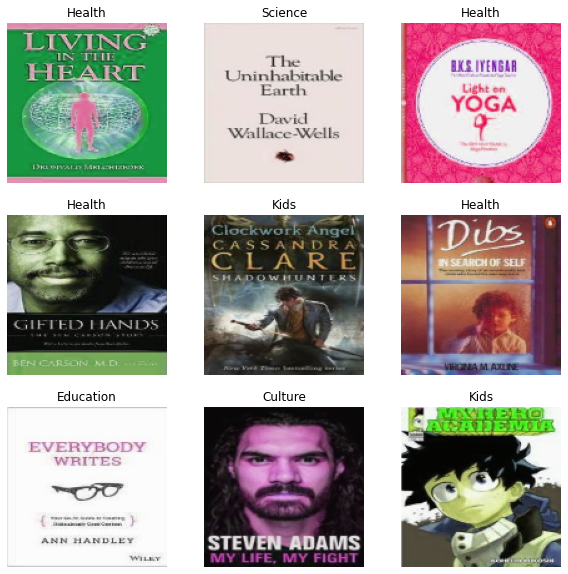

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image = ((images[i].numpy() + 1) * 127.5).astype("uint8")
        plt.imshow(image)
        plt.title(classes[tf.argmax(labels[i])])
        plt.axis("off")

Let's start with pretrained keras [model](https://www.tensorflow.org/tutorials/images/transfer_learning):

In [29]:
from keras.models import Model
from keras.layers import Input, Dense, Reshape, GlobalAveragePooling2D, Conv2DTranspose, Dropout, Embedding, Concatenate
from keras.layers import Activation, BatchNormalization
from keras.initializers import RandomNormal
from keras.optimizers import Adam
import os

In [30]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet', classes=num_classes)

In [31]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [32]:
base_model.trainable = False

...and add couple of layers:

In [33]:
def get_model(base_model):
    global_average_layer = GlobalAveragePooling2D()
    dense_layer1 = Dense(1024, activation='relu')
    dense_layer2 = Dense(512, activation='relu')
    prediction_layer = Dense(num_classes, activation='softmax')
    inputs = Input(shape=img_shape)
    x = base_model(inputs, training=False)
    x = global_average_layer(x)
    x = Dropout(0.6)(x)
    x = dense_layer1(x)
    x = Dropout(0.6)(x)
    x = dense_layer2(x)
    x = Dropout(0.6)(x)
    outputs = prediction_layer(x)
    return Model(inputs, outputs)

In [474]:
model = get_model(base_model)

In [213]:
image_batch, label_batch = next(iter(val_ds))
feature_batch = model(image_batch)
print(feature_batch.shape, label_batch.shape)

(1024, 12) (1024, 12)


In [214]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['CategoricalAccuracy', 'Precision', 'Recall'])
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_29 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0  

In [215]:
checkpoint_filepath = './keras_checkpoints/mobilev2-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

In [38]:
loss0, metric0, _, _ = model.evaluate(val_ds)
loss0

5/5 [==============================] - 19s 4s/step - loss: 2.6724 - categorical_accuracy: 0.1082 - precision: 0.1095 - recall: 0.0031


2.6724236011505127

In [39]:
epochs = 100

history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds, 
                    callbacks=[model_checkpoint_callback],
                    class_weight=class_weights)

Epoch 1/100
23/23 [==============================] - 106s 5s/step - loss: 1.1171 - categorical_accuracy: 0.1046 - precision: 0.0902 - recall: 0.0120 - val_loss: 2.4701 - val_categorical_accuracy: 0.1460 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 106s 5s/step - loss: 0.9001 - categorical_accuracy: 0.1060 - precision: 0.3333 - recall: 4.3840e-05 - val_loss: 2.4576 - val_categorical_accuracy: 0.1555 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 107s 5s/step - loss: 0.8864 - categorical_accuracy: 0.1331 - precision: 0.5000 - recall: 3.5072e-04 - val_loss: 2.3979 - val_categorical_accuracy: 0.2060 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 108s 5s/step - loss: 0.8803 - categorical_accuracy: 0.1422 - precision: 0.3088 - recall: 9.2065e-04 - val_loss: 2.3554 - val_categorical_accuracy: 0.2203 - val_precision: 

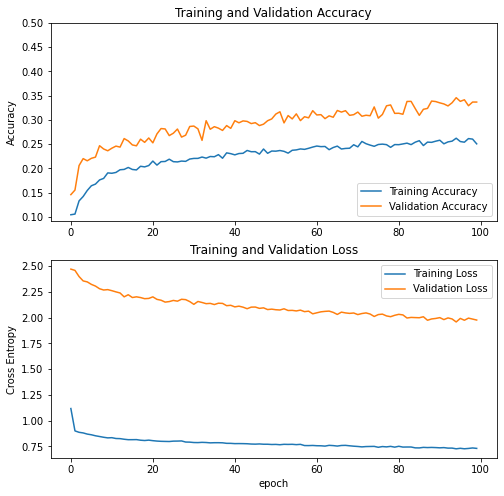

In [42]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.5])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

We can fine-tune the model by unfreezing part of layers:

In [216]:
base_model.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [217]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['CategoricalAccuracy', 'Precision', 'Recall'])
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_29 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0  

In [45]:
fine_tune_epochs = 300
total_epochs =  epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds,
                         callbacks=[model_checkpoint_callback],
                         class_weight=class_weights
                        )

Epoch 100/400
23/23 [==============================] - 143s 6s/step - loss: 0.8880 - categorical_accuracy: 0.1646 - precision: 0.2986 - recall: 0.0164 - val_loss: 2.0467 - val_categorical_accuracy: 0.2839 - val_precision: 0.9158 - val_recall: 0.0178
Epoch 101/400
23/23 [==============================] - 141s 6s/step - loss: 0.7777 - categorical_accuracy: 0.2243 - precision: 0.4985 - recall: 0.0374 - val_loss: 2.0193 - val_categorical_accuracy: 0.3111 - val_precision: 0.8462 - val_recall: 0.0247
Epoch 102/400
23/23 [==============================] - 150s 7s/step - loss: 0.7662 - categorical_accuracy: 0.2322 - precision: 0.4954 - recall: 0.0398 - val_loss: 2.0557 - val_categorical_accuracy: 0.2904 - val_precision: 0.8895 - val_recall: 0.0329
Epoch 103/400
23/23 [==============================] - 146s 6s/step - loss: 0.7546 - categorical_accuracy: 0.2426 - precision: 0.5135 - recall: 0.0483 - val_loss: 2.0626 - val_categorical_accuracy: 0.2949 - val_precision: 0.8675 - val_recall: 0.0295


In [46]:
acc += history_fine.history['categorical_accuracy']
val_acc += history_fine.history['val_categorical_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

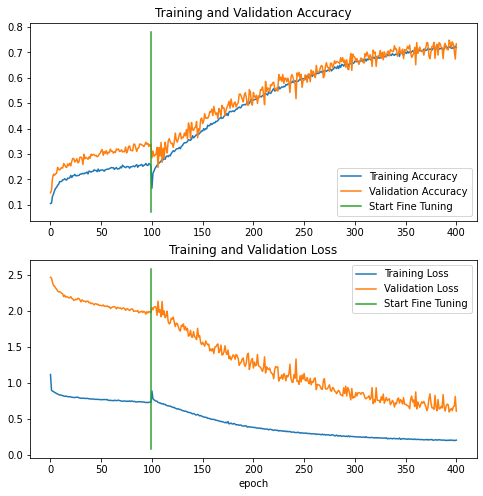

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([epochs-1, epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [93]:
model.load_weights('./keras_checkpoints/mobilev2-393-0.75.hdf5')

In [126]:
y_pred = []
y_true = []
for image_batch, label_batch in test_ds.as_numpy_iterator():
    predictions = model.predict_on_batch(image_batch)
    y_pred.extend(list(np.argmax(predictions, axis=1)))
    y_true.extend(list(np.argmax(label_batch, axis=1)))

In [392]:
from sklearn.metrics import classification_report, accuracy_score

<AxesSubplot:>

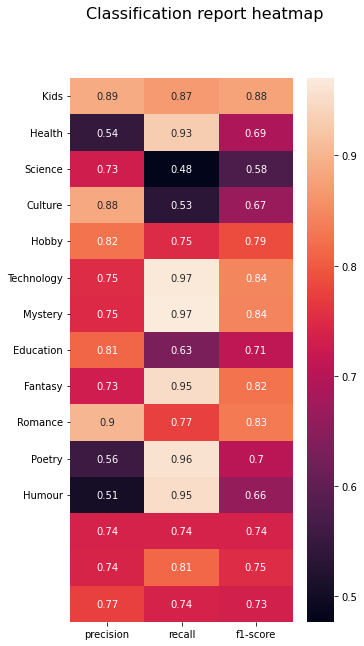

In [128]:
clf_report = classification_report(y_true, y_pred, output_dict=True)
plt.figure(figsize=(5, 10))
plt.suptitle('Classification report heatmap', fontsize=16)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, yticklabels=classes)

Not so bad! Let's look, what classes are often get mixed up:

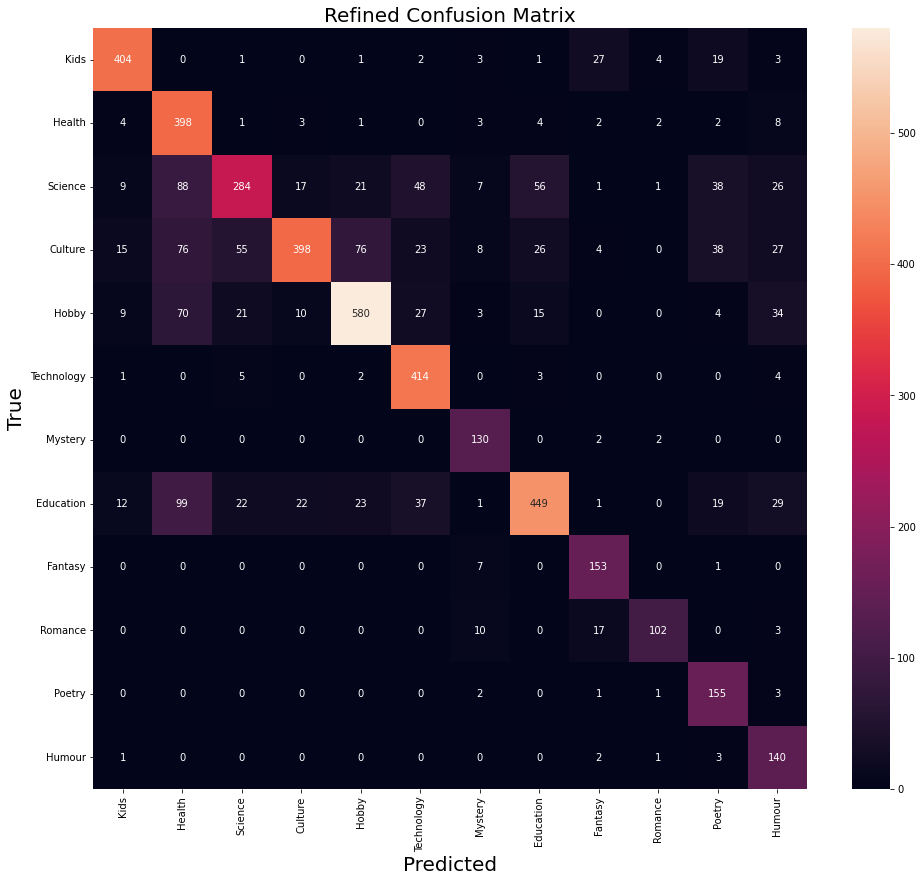

In [129]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(classes, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(classes, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Refined Confusion Matrix', fontsize=20)
plt.show()

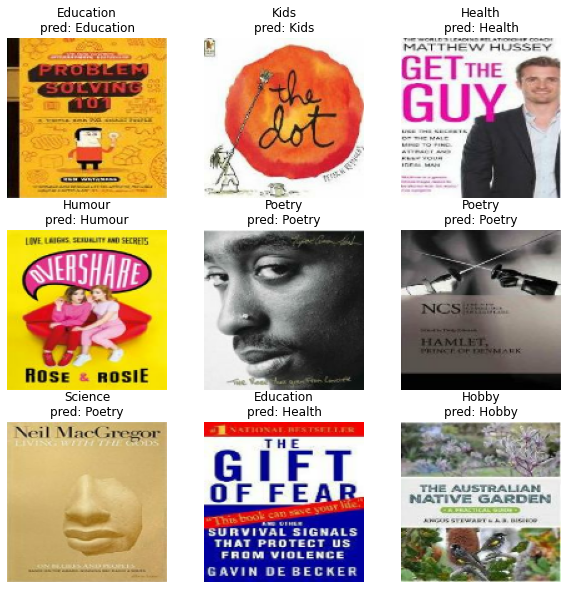

In [131]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
# Apply a sigmoid since our model returns logits
predictions = np.argmax(predictions, axis=1)
label_batch = np.argmax(label_batch, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(((image_batch[i] + 1) * 127.5).astype("uint8"))
  plt.title(classes[label_batch[i]] + '\npred: ' + classes[predictions[i]])
  plt.axis("off")

Next I'll try to create a Tensorflow model without keras:

In [1]:
def conv2d(x, W, b, strides=1, padding='SAME'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    mean_x, std_x = tf.nn.moments(x, axes=[0])
    x = tf.nn.batch_normalization(x, mean_x, std_x, None, None, 1e-12)
    return tf.nn.relu(x)

In [2]:
def mobile_block(x, W1, b1, W2, b2, padding='SAME', strides=1):
    x = tf.nn.depthwise_conv2d(x, W1, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b1)
    mean_x, std_x = tf.nn.moments(x, axes=[0])
    x = tf.nn.batch_normalization(x, mean_x, std_x, None, None, 1e-12)
    x = tf.nn.relu(x)
    return  conv2d(x, W2, b2, padding=padding, strides=1)

In [120]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.weights_ = {
                    'wcon': tf.Variable(tf.random.normal([3, 3, 3, 32]), name='WCON'),

                    'wdc0': tf.Variable( tf.random.normal([3, 3, 32, 1]), name='WD0'),
                    'wc0': tf.Variable( tf.random.normal([3, 3, 32, 32]), name='W0'),

                    'wdc1': tf.Variable( tf.random.normal([3, 3, 32, 2]), name='WD1'),
                    'wc1': tf.Variable( tf.random.normal([3, 3, 64, 64]), name='W1'),    
                    'wdc2': tf.Variable( tf.random.normal([3, 3, 64, 1]), name='WD2'),
                    'wc2': tf.Variable( tf.random.normal([3, 3, 64, 64]), name='W2'),

                    'wdc3': tf.Variable( tf.random.normal([3, 3, 64, 2]), name='WD3'),
                    'wc3': tf.Variable( tf.random.normal([3, 3, 128, 128]), name='W3'),
                    'wdc4': tf.Variable( tf.random.normal([3, 3, 128, 1]), name='WD4'),
                    'wc4': tf.Variable( tf.random.normal([3, 3, 128, 128]), name='W4'),

                    'wdc5': tf.Variable( tf.random.normal([3, 3, 128, 2]), name='WD5'),
                    'wc5': tf.Variable( tf.random.normal([3, 3, 256, 256]), name='W5'),

                    'wdc6': tf.Variable( tf.random.normal([3, 3, 256, 2]), name='WD6'),
                    'wc6': tf.Variable( tf.random.normal([3, 3, 512, 512]), name='W6'),
                    'wdc7': tf.Variable( tf.random.normal([3, 3, 512, 1]), name='WD7'),
                    'wc7': tf.Variable( tf.random.normal([3, 3, 512, 512]), name='W7'),

                    'wdc8': tf.Variable( tf.random.normal([3, 3, 512, 2]), name='WD8'),
                    'wc8': tf.Variable( tf.random.normal([3, 3, 1024, 1024]), name='W8'),
                    'wdc9': tf.Variable( tf.random.normal([3, 3, 1024, 1]), name='WD9'),
                    'wc9': tf.Variable( tf.random.normal([3, 3, 1024, 1024]), name='W9'),

                    'wf1': tf.Variable( tf.random.normal([1024, 512]), name='WF1'),
                    'out': tf.Variable( tf.random.normal([512, num_classes]), name='WOUT'),
                }
        self.biases = {
                    'bcon': tf.Variable(tf.random.normal([32]), name='BCON'),

                    'bdc0': tf.Variable( tf.random.normal([32]), name='BD0'),
                    'bc0': tf.Variable( tf.random.normal([32]), name='B0'),

                    'bdc1': tf.Variable( tf.random.normal([64]), name='BD1'),
                    'bc1': tf.Variable( tf.random.normal([64]), name='B1'),
                    'bdc2': tf.Variable( tf.random.normal([64]), name='BD2'),
                    'bc2': tf.Variable( tf.random.normal([64]), name='B2'),

                    'bdc3': tf.Variable( tf.random.normal([128]), name='BD3'),
                    'bc3': tf.Variable( tf.random.normal([128]), name='B3'),
                    'bdc4': tf.Variable( tf.random.normal([128]), name='BD4'),
                    'bc4': tf.Variable( tf.random.normal([128]), name='B4'),

                    'bdc5': tf.Variable( tf.random.normal([256]), name='BD5'),
                    'bc5': tf.Variable( tf.random.normal([256]), name='B5'),

                    'bdc6': tf.Variable( tf.random.normal([512]), name='BD6'),
                    'bc6': tf.Variable( tf.random.normal([512]), name='B6'),
                    'bdc7': tf.Variable( tf.random.normal([512]), name='BD7'),
                    'bc7': tf.Variable( tf.random.normal([512]), name='B7'),

                    'bdc8': tf.Variable( tf.random.normal([1024]), name='BD8'),
                    'bc8': tf.Variable( tf.random.normal([1024]), name='B8'),
                    'bdc9': tf.Variable( tf.random.normal([1024]), name='BD9'),
                    'bc9': tf.Variable( tf.random.normal([1024]), name='B9'),

                    'bf1': tf.Variable( tf.random.normal([512]), name='BF1'),
                    'out': tf.Variable( tf.random.normal([num_classes]), name='BOUT'),
                }
      
    def __call__(self, x):  
        b0 = conv2d(x, self.weights_['wcon'], self.biases['bcon'], strides=2)  #  (64, 64, 32)
        b1 = mobile_block(b0, self.weights_['wdc0'], self.biases['bdc0'], self.weights_['wc0'], self.biases['bc0']) #  (64, 64, 32)

        b2 = mobile_block(b1, self.weights_['wdc1'], self.biases['bdc1'], self.weights_['wc1'], self.biases['bc1'], strides=2)  #  (32, 32, 64)
        b3 = mobile_block(b2, self.weights_['wdc2'], self.biases['bdc2'], self.weights_['wc2'], self.biases['bc2'])  #  (32, 32, 64)

        b4 = mobile_block(b3, self.weights_['wdc3'], self.biases['bdc3'], self.weights_['wc3'], self.biases['bc3'], strides=2)  #  (16, 16, 128)
        b5 = mobile_block(b4, self.weights_['wdc4'], self.biases['bdc4'], self.weights_['wc4'], self.biases['bc4'])  # (16, 16, 128)

        b6 = mobile_block(b5, self.weights_['wdc5'], self.biases['bdc5'], self.weights_['wc5'], self.biases['bc5'])  # (16, 16, 256)

        b7 = mobile_block(b6, self.weights_['wdc6'], self.biases['bdc6'], self.weights_['wc6'], self.biases['bc6'], strides=2)  # (8, 8, 512)
        b8 = mobile_block(b7, self.weights_['wdc7'], self.biases['bdc7'], self.weights_['wc7'], self.biases['bc7'])  # (8, 8, 512)

        b9 = mobile_block(b8, self.weights_['wdc8'], self.biases['bdc8'], self.weights_['wc8'], self.biases['bc8'])  #  (8, 8, 1024)
        b10 = mobile_block(b9, self.weights_['wdc9'], self.biases['bdc9'], self.weights_['wc9'], self.biases['bc9'], strides=2)  #  (4, 4, 1024)

        avg = tf.nn.avg_pool2d(b10, ksize=4, strides=1, padding='VALID', name="AVG") #  (1, 1, 1024)
        fc1 = tf.reshape(avg, [-1, 1024])  #  (1024)
        fc1 = tf.add(tf.matmul(fc1, self.weights_['wf1']), self.biases['bf1'])  
        fc1 = tf.nn.relu(fc1)  # (512)
        fc1 = tf.nn.dropout(fc1, 0.2)
        out = tf.add(tf.matmul(fc1, self.weights_['out']), self.biases['out'])  #  (12)
        return out

(I'm using [this](https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch) example)

In [121]:
my_model = MyModel()

In [122]:
def loss_fn(Y, logits):
     return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

In [123]:
# Training Parameters
learning_rate = 0.001
num_steps = 200
batch_size = 1024
display_step = 10

In [128]:
# Define loss and optimizer
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

In [129]:
from tqdm import tqdm

In [131]:
epochs = 1
for epoch in tqdm(range(epochs)):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_ds):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            logits = my_model(x_batch_train)  # Logits for this minibatch
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, my_model.weights)
        optimizer.apply_gradients(zip(grads, my_model.weights))
        train_acc_metric.update_state(y_batch_train, logits)
        print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
        print("Seen so far: %d samples" % ((step + 1) * batch_size))

    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_ds:
        val_logits = my_model(x_batch_val)
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))

  0%|          | 0/1 [00:00<?, ?it/s]


Start of epoch 0
Training loss (for one batch) at step 0: 99.2111
Seen so far: 1024 samples
Training loss (for one batch) at step 1: 97.4030
Seen so far: 2048 samples
Training loss (for one batch) at step 2: 93.1243
Seen so far: 3072 samples
Training loss (for one batch) at step 3: 89.7275
Seen so far: 4096 samples
Training loss (for one batch) at step 4: 91.0201
Seen so far: 5120 samples
Training loss (for one batch) at step 5: 88.8349
Seen so far: 6144 samples
Training loss (for one batch) at step 6: 88.9739
Seen so far: 7168 samples
Training loss (for one batch) at step 7: 88.2764
Seen so far: 8192 samples
Training loss (for one batch) at step 8: 86.7592
Seen so far: 9216 samples
Training loss (for one batch) at step 9: 78.6401
Seen so far: 10240 samples
Training loss (for one batch) at step 10: 82.6103
Seen so far: 11264 samples
Training loss (for one batch) at step 11: 81.2300
Seen so far: 12288 samples
Training loss (for one batch) at step 12: 78.7445
Seen so far: 13312 samples


100%|██████████| 1/1 [30:11<00:00, 1811.56s/it]

Validation acc: 0.1287


OK, it's learning, but it's taking a lot of time, so I'll just stop here. 
 
Currently I'm working at GAN, generating new covers. Stay tuned!

https://machinelearningmastery.com/how-to-develop-an-auxiliary-classifier-gan-ac-gan-from-scratch-with-keras/

In [34]:
from tensorflow.keras import backend
 
# implementation of wasserstein loss
def wasserstein_loss(y_true, y_pred):
    return backend.mean(y_true * y_pred)

In [34]:
def get_discriminator():
    init = RandomNormal(stddev=0.02)
    base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, classes=num_classes)
    model = get_model(base_model)
    fine_tune_at = 100
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    model.load_weights('./keras_checkpoints/mobilev2-393-0.75.hdf5')

    out1 = Dense(1, kernel_initializer=init, activation='sigmoid')(model.layers[-2].output)
    out2 = model.layers[-1].output

    model = Model(model.layers[0].input, [out1, out2])
    lr_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(
    0.0005,
    32,
    t_mul=2.0,
    m_mul=1.0,
    alpha=0.0,
    name=None
)
    opt = Adam(learning_rate=0.001)
    model.compile(loss=[tf.keras.losses.BinaryCrossentropy(from_logits=False), tf.keras.losses.CategoricalCrossentropy(from_logits=False)], optimizer=opt)
    return model

In [35]:
discriminator = get_discriminator()
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenetv2_1.00_128 (Function  (None, 4, 4, 1280)  2257984     ['input_3[0][0]']                
 al)                                                                                              
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['mobilenetv2_1.00_128[0][0]']   
 alAveragePooling2D)                                                                        

In [36]:
def get_generator(latent_dim, n_classes=num_classes):
    init = RandomNormal(stddev=0.02)
    in_label = Input(shape=(n_classes,))
    li = Dense(16, kernel_initializer=init)(in_label)
    li = Reshape((4, 4, 1))(li)
    
    in_lat = Input(shape=(latent_dim,))
    n_nodes = 4 * 4 * 127
    gen = Dense(n_nodes, kernel_initializer=init)(in_lat)
    gen = Activation('relu')(gen)
    gen = Reshape((4, 4, 127))(gen)
    
    merge = Concatenate()([gen, li])
    # upsample to 8x8
    gen = Conv2DTranspose(512, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(merge)
    gen = BatchNormalization()(gen)
    gen = Activation('leaky_relu')(gen)
    # upsample to 16x16
    gen = Conv2DTranspose(256, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
    gen = BatchNormalization()(gen)
    gen = Activation('leaky_relu')(gen)
    
    # upsample to 32x32
    gen = Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
    gen = BatchNormalization()(gen)
    gen = Activation('leaky_relu')(gen)
    
    # upsample to 64x64
    gen = Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
    gen = BatchNormalization()(gen)
    gen = Activation('leaky_relu')(gen)
    
    # upsample to 128x128
    gen = Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
    out_layer = Activation('tanh')(gen)
    # define model
    model = Model([in_lat, in_label], out_layer)
    return model
 
# define the size of the latent space
latent_dim = 256
# define the generator model
generator = get_generator(latent_dim)
# summarize the model
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 2032)         522224      ['input_5[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 activation (Activation)        (None, 2032)         0           ['dense_5[0][0]']                
                                                                                            

In [37]:
def get_gan(g_model, d_model):
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
    gan_output = d_model(g_model.output)
    model = Model(g_model.input, gan_output)
    
    lr_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(
        20.,
        32,
        t_mul=2.0,
        m_mul=1.0,
        alpha=0.001,
        name=None
    )
    opt = Adam(learning_rate=1.)
    model.compile(loss=[tf.keras.losses.BinaryCrossentropy(from_logits=False), tf.keras.losses.CategoricalCrossentropy(from_logits=False)], optimizer=opt)
    return model

In [38]:
gan = get_gan(generator, discriminator)
gan.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 2032)         522224      ['input_5[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 activation (Activation)        (None, 2032)         0           ['dense_5[0][0]']                
                                                                                            

In [39]:
batch_size = 512
num_epochs = 200
save_dir = './generated'
checkpoint_dir = './gan_model/'
ds_gen = ds.shuffle(1000).map(normalize).batch(batch_size)

In [41]:
def train_step(real_images, real_class_labels):
    random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))
    fake_class_labels = tf.one_hot(np.random.randint(0, num_classes, batch_size), num_classes)
    fake_images = generator([random_latent_vectors, fake_class_labels])
    combined_images = tf.concat([fake_images, real_images], axis=0)
    labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((real_images.shape[0], 1))], axis=0)
    class_labels = tf.concat([fake_class_labels, real_class_labels], axis=0)
     # Add random noise to the labels:
    # labels += 0.01 * tf.random.uniform(labels.shape)
    discriminator.trainable = True
    for layer in discriminator.layers[:-5]:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
    _, d_1, d_2 = discriminator.train_on_batch(combined_images, [labels, class_labels])
        
    random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))
    fake_class_labels = tf.one_hot(np.random.randint(0, num_classes, batch_size), num_classes)
    misleading_labels = tf.zeros((batch_size, 1))
    # misleading_labels += 0.05 * tf.random.uniform(misleading_labels.shape)
    discriminator.trainable = False
    _, g_1, g_2 = gan.train_on_batch([random_latent_vectors, fake_class_labels], [misleading_labels, fake_class_labels])
    return (d_1, d_2), (g_1, g_2), fake_images,

In [ ]:
start_epoch = 0
for epoch in range(start_epoch, num_epochs):
    print("\nStart epoch", epoch + 1)
    d_losses = []
    g_losses = []
    for step, (real_images, real_labels) in (pbar:= tqdm(enumerate(ds_gen.as_numpy_iterator()), total=len(ds_gen))):
        d_loss, g_loss, generated_images = train_step(real_images, real_labels)
        d_losses.append(d_loss)
        g_losses.append(g_loss)
        pbar.set_description("disc_lab: %.2f, disc_class: %.2f, adv_lab: %.2f, adv_class %.2f" % (d_loss[0], d_loss[1], g_loss[0], g_loss[1]))
        # if step % 20 == 0:
        #     plt.imshow(generated_images[0])
        #     plt.show()
    d_loss = np.mean(np.array(d_losses), axis=0)
    g_loss = np.mean(np.array(g_losses), axis=0)
    print("discriminator loss: %.2f, %.2f" % (d_loss[0], d_loss[1]))
    print("adversarial loss: %.2f, %.2f" % (g_loss[0], g_loss[1]))
    img = tf.keras.preprocessing.image.array_to_img(
                (generated_images[0] + 1) * 127.5, scale=False
            )
    img.save(os.path.join(save_dir, "img" + str(epoch + 1) + ".png"))
    gan.save(os.path.join(checkpoint_dir, 'gan_%04d.h5' % (epoch + 1)))


Start epoch 1


disc_lab: 0.69, disc_class: 2.51, adv_lab: 0.71, adv_class 2.52: 100%|██████████| 64/64 [27:57<00:00, 26.22s/it] 


discriminator loss: 0.74, 3.27
adversarial loss: 0.72, 3.49

Start epoch 2


disc_lab: 0.69, disc_class: 2.49, adv_lab: 0.71, adv_class 2.53:  22%|██▏       | 14/64 [06:04<21:46, 26.14s/it]

In [44]:
# gan.load_weights('./gan_model/gan_0029.h5')

In [44]:
from copy import deepcopy

In [61]:
gan.optimizer.learning_rate = 0.1
discriminator.optimizer.learning_rate = 0.01